In [69]:
from datetime import datetime,timedelta
start_time = datetime.now()
import calendar
# Libraries to install
# %pip install pandas-profiling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print('LOAD DURATION: ', datetime.now() - start_time) # load time about 30 seconds

LOAD DURATION:  0:00:00.007943


In [2]:
%cd "D:\USC\4th semester\DSO562 fraud"

D:\USC\4th semester\DSO562 fraud


In [11]:
data=pd.read_csv('card transactions.csv', converters={'Merchnum': lambda x: str(x)})

In [12]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [13]:
data.shape

(96753, 10)

In [61]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [ ]:
# cat: Recnum, Cardnum, Merchnum, Merch desc, merch state, merch zip, transtype,fraud
# num: date, amount

In [19]:
numrecords=len(data)

In [20]:
numrecords

96753

In [27]:
data['Date'].max()

'2006-12-31'

In [15]:
def get_summary(column_name):
    col_populate=data[column_name].count() * 100 / numrecords
    col_min=data[column_name].min()
    col_max=data[column_name].max()
    col_mean=data[column_name].mean()
    col_median=data[column_name].median()
    col_std=data[column_name].std()
    col_zero=len(data[data[column_name]==0])/len(data[column_name])
    output=f'%populated: {col_populate} Min: {col_min} Max: {col_max} Mean: {col_mean} Median: {col_median} Std: {col_std} Zero: {col_zero}'
    return output

In [16]:
def get_summary_cat(column_name):
    col_populate=data[column_name].count() * 100 / numrecords
    col_unique=len(data[column_name].unique())
    col_most=data[column_name].mode()[0]
    output=f'%populated: {col_populate} #Unique: {col_unique} Most: {col_most}'
    return output

In [28]:
get_summary('Amount')

'%populated: 100.0 Min: 0.01 Max: 3102045.53 Mean: 427.88567744670206 Median: 137.98 Std: 10006.140301905294 Zero: 0.0'

In [29]:
get_summary_cat('Recnum')

'%populated: 100.0 #Unique: 96753 Most: 1'

In [30]:
get_summary_cat('Cardnum')

'%populated: 100.0 #Unique: 1645 Most: 5142148452'

In [40]:
len(data[data['Cardnum']==5142148452])

1192

In [31]:
get_summary_cat('Merchnum')

'%populated: 100.0 #Unique: 13092 Most: 930090121224'

In [32]:
get_summary_cat('Merch description')

'%populated: 100.0 #Unique: 13126 Most: GSA-FSS-ADV'

In [33]:
get_summary_cat('Merch state')

'%populated: 98.76489617892985 #Unique: 228 Most: TN'

In [34]:
get_summary_cat('Merch zip')

'%populated: 95.1877461163995 #Unique: 4568 Most: 38118.0'

In [35]:
get_summary_cat('Transtype')

'%populated: 100.0 #Unique: 4 Most: P'

In [36]:
get_summary_cat('Fraud')

'%populated: 100.0 #Unique: 2 Most: 0'

In [44]:
data['Date']=pd.to_datetime(data['Date'])

<AxesSubplot:title={'center':'Daily Transcations'}, xlabel='Date'>

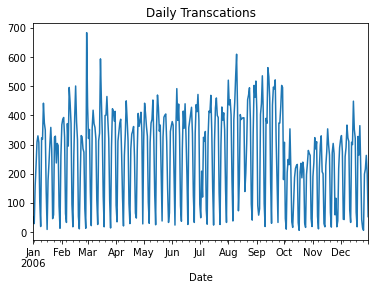

In [45]:
data.assign(trx=np.ones(numrecords)).set_index(data['Date']).resample(timedelta(days=1)).count().trx.plot(title='Daily Transcations')

<AxesSubplot:title={'center':'Weekly Transcations'}, xlabel='Date'>

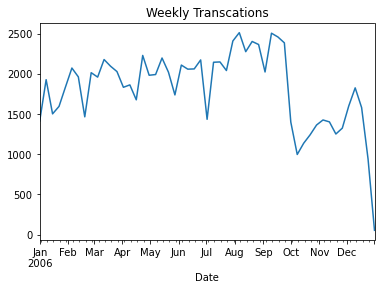

In [50]:
data.assign(trx=np.ones(numrecords)).set_index(data['Date']).resample(timedelta(days=7)).count().trx.plot(title='Weekly Transcations')

<AxesSubplot:title={'center':'Approximately Monthly Transcations'}, xlabel='Date'>

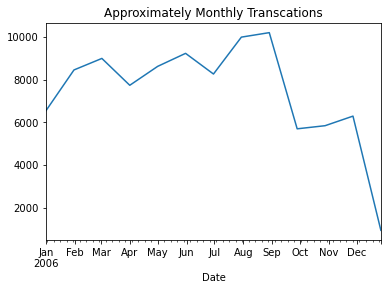

In [51]:
data.assign(trx=np.ones(numrecords)).set_index(data['Date']).resample(timedelta(days=30)).count().trx.plot(title='Approximately Monthly Transcations')

<AxesSubplot:xlabel='Date'>

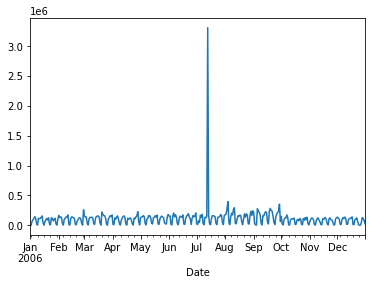

In [57]:
data.groupby('Date')['Amount'].sum().plot.line()

In [75]:
data['Month']=pd.to_datetime(data['Date']).dt.month_name().str[:3]

<AxesSubplot:xlabel='Month'>

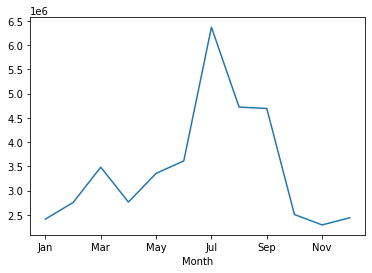

In [77]:
data.groupby('Month',sort=False)['Amount'].sum().plot.line()

<AxesSubplot:>

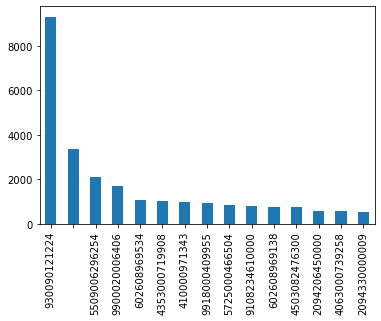

In [88]:
data['Merchnum'].value_counts().head(15).plot(kind='bar')

In [83]:
data['Merchnum'].value_counts().head(10)

930090121224     9310
                 3375
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
410000971343      982
9918000409955     956
5725000466504     872
9108234610000     817
Name: Merchnum, dtype: int64

In [86]:
data['Merchnum'].isna().sum()

0

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           96753 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
 10  Month              96753 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 8.1+ MB


<AxesSubplot:>

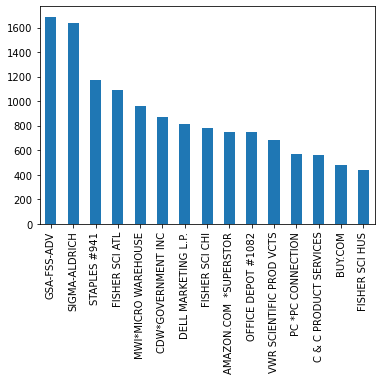

In [89]:
data['Merch description'].value_counts().head(15).plot(kind='bar')

<AxesSubplot:>

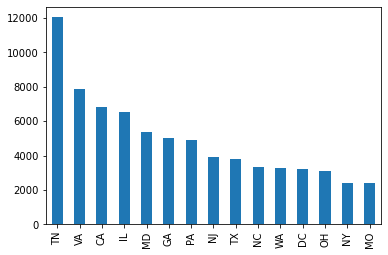

In [109]:
data['Merch state'].astype(str).value_counts().head(15).plot(kind='bar')

<AxesSubplot:>

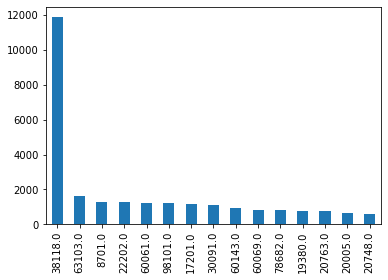

In [93]:
data['Merch zip'].value_counts().head(15).plot(kind='bar')

<AxesSubplot:>

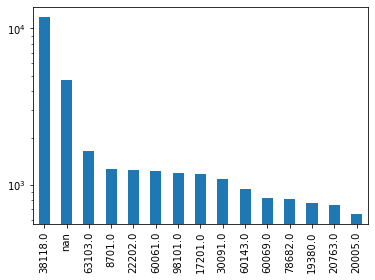

In [108]:
plt.yscale('log')
data['Merch zip'].astype(str).value_counts().head(15).plot(kind='bar')

<AxesSubplot:>

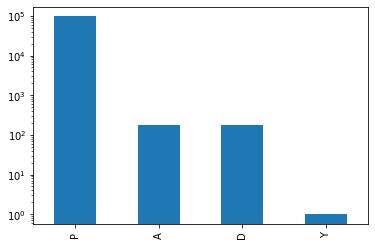

In [110]:
plt.yscale('log')
data['Transtype'].value_counts().head(15).plot(kind='bar')

<AxesSubplot:>

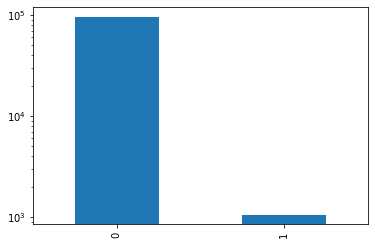

In [111]:
plt.yscale('log')
data['Fraud'].value_counts().head(15).plot(kind='bar')